In [1]:
%run -m celldom.nb.logging

In [2]:
import os
import os.path as osp
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import pandas as pd
from celldom.core import cytometry
from celldom.config import experiment_config
from celldom.dataset import marker_dataset
from celldom.extract import NO_IMAGES, ALL_IMAGES, APT_IMAGES
import celldom
plt.gray()
None

In [3]:
config = experiment_config.ExperimentConfig(celldom.get_config('experiment', 'experiment_example_G3'))

In [4]:
config.field_names

['street',
 'hours',
 'color',
 'pump',
 'cohort',
 'condition',
 'apartment',
 'datetime']

In [5]:
config.path_regex

'.*/.*(?P<pump>Elveflow|gravity)/.*/.* (?P<color>Orange|Red|White|Pink|Green|Blue|Yellow) (?P<condition>1|3) (?P<cohort>Control|[0-9\\.]{1,}uM) (?P<hours>[0-9]{1,3}) hr/BFF_16X_St_(?P<street>[0-9]{3})_Apt_(?P<apartment>[0-9]{3})_(?P<datetime>[0-9]{12}).tif'

In [6]:
config.parse_path('/_2018.06.14 EXP SUM Control 0.1uM with 5mL gravity/2018.06.14 White 3 Control/2018.06.14 White 3 Control 0 hr/BFF_16X_St_003_Apt_010_201806150024.tif')

{'apartment': '010',
 'cohort': 'Control',
 'color': 'White',
 'condition': '3',
 'datetime': Timestamp('2018-06-15 00:24:00'),
 'hours': '0',
 'pump': 'gravity',
 'street': '003'}

In [7]:
import imp
imp.reload(cytometry)

<module 'celldom.core.cytometry' from '/lab/repos/celldom/python/source/celldom/core/cytometry.py'>

In [8]:
output_dir = '/tmp/test'
if osp.exists(output_dir):
    !rm -rf /tmp/test/*
cytometer = cytometry.Cytometer(config, output_dir)

In [9]:
cytometer.initialize()

Using TensorFlow backend.


In [10]:
#exp_dir = '_2018.06.14 EXP SUM Control 0.1uM with 5mL gravity/2018.06.14 White 3 Control/2018.06.14 White 3 Control 43 hr'
exp_dir = '_2018.06.14 EXP SUM Control 0.1uM with 5mL gravity/2018.06.14 Red 3 Control/2018.06.14 Red 3 Control 0 hr'
path = osp.join(celldom.get_data_dir(), 'dataset', 'dataset05', exp_dir)
path

'/lab/data/celldom/dataset/dataset05/_2018.06.14 EXP SUM Control 0.1uM with 5mL gravity/2018.06.14 Red 3 Control/2018.06.14 Red 3 Control 0 hr'

In [11]:
!ls "$path" | head -n 10

2018.06.14 Red 3 Control 0 hr.txt
BFF_16X_St_000_Apt_000_201806142326.tif
BFF_16X_St_000_Apt_002_201806142326.tif
BFF_16X_St_000_Apt_004_201806142326.tif
BFF_16X_St_000_Apt_006_201806142326.tif
BFF_16X_St_000_Apt_008_201806142326.tif
BFF_16X_St_000_Apt_010_201806142326.tif
BFF_16X_St_000_Apt_012_201806142326.tif
BFF_16X_St_000_Apt_014_201806142326.tif
BFF_16X_St_000_Apt_016_201806142326.tif


In [12]:
#img_path = osp.join(path, 'BFF_16X_St_000_Apt_012_201806161824.tif')
#img_path = osp.join(path, 'BFF_16X_St_000_Apt_010_201806161824.tif')
img_path = osp.join(path, 'BFF_16X_St_009_Apt_030_201806142327.tif')
img_path

'/lab/data/celldom/dataset/dataset05/_2018.06.14 EXP SUM Control 0.1uM with 5mL gravity/2018.06.14 Red 3 Control/2018.06.14 Red 3 Control 0 hr/BFF_16X_St_009_Apt_030_201806142327.tif'

In [13]:
img_raw = io.imread(img_path)
img_raw.dtype, img_raw.shape

(dtype('uint8'), (1200, 1600))

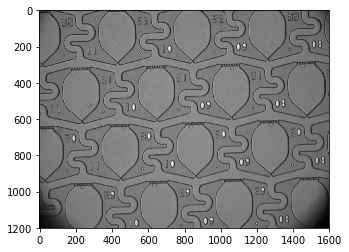

In [14]:
plt.imshow(img_raw)

In [15]:
acq = cytometry.Acquisition(config, img_path)

In [16]:
img = acq.load_image()
img.dtype, img.shape

(dtype('uint8'), (750, 1000, 3))

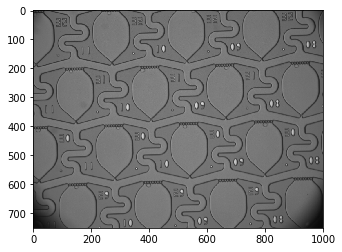

In [17]:
plt.imshow(img)

In [18]:
#cytometer.marker_model.config.display()

In [19]:
%%time
#acq_data, apt_data, cell_data = cytometer.analyze(acq, dpf=NO_IMAGES)
acq_data, apt_data, cell_data = cytometer.analyze(acq, dpf=ALL_IMAGES)
#acq_data, apt_data, cell_data = cytometer.analyze(acq, dpf=APT_IMAGES)

CPU times: user 5.45 s, sys: 3.73 s, total: 9.18 s
Wall time: 5.42 s


In [20]:
cytometer.save(acq_data, apt_data, cell_data)

In [21]:
cytometer.datastore.store.flush()
cytometer.images.store.flush()

In [22]:
acq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 16 columns):
acq_apartment             1 non-null object
acq_cohort                1 non-null object
acq_color                 1 non-null object
acq_condition             1 non-null object
acq_datetime              1 non-null datetime64[ns]
acq_hours                 1 non-null object
acq_id                    1 non-null object
acq_processed_at          1 non-null datetime64[ns]
acq_pump                  1 non-null object
acq_street                1 non-null object
apt_count                 1 non-null int64
raw_image_path            1 non-null object
raw_image_shape_height    1 non-null int64
raw_image_shape_width     1 non-null int64
raw_norm_image            1 non-null object
rotation                  1 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(3), object(10)
memory usage: 208.0+ bytes


In [23]:
apt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 41 columns):
acq_apartment             6 non-null object
acq_cohort                6 non-null object
acq_color                 6 non-null object
acq_condition             6 non-null object
acq_datetime              6 non-null datetime64[ns]
acq_hours                 6 non-null object
acq_id                    6 non-null object
acq_processed_at          6 non-null datetime64[ns]
acq_pump                  6 non-null object
acq_street                6 non-null object
apt_id                    6 non-null int64
apt_image                 6 non-null object
apt_image_height          6 non-null int64
apt_image_width           6 non-null int64
apt_num                   6 non-null object
apt_num_digit_images      6 non-null object
apt_num_digit_scores      6 non-null object
apt_num_image             6 non-null object
cell_area_mean            6 non-null float64
cell_area_p10             6 non-null float64
cell

In [24]:
acq_data.rotation

0   -1.440403
Name: rotation, dtype: float64

In [25]:
#plt.imshow(acq_data.raw_norm_image.iloc[0])

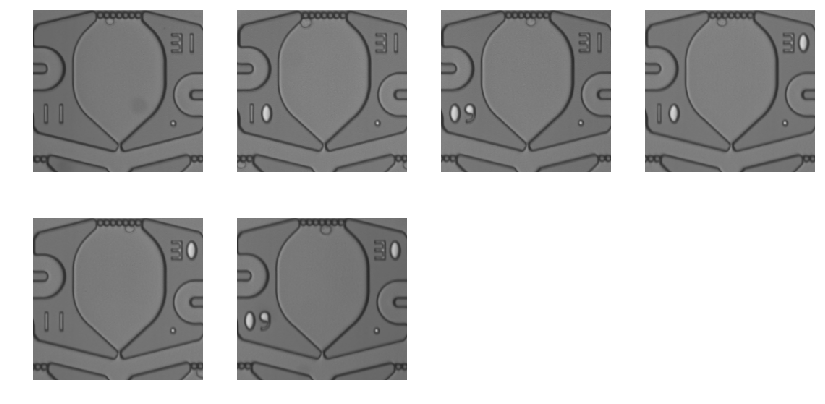

In [26]:
from cvutils.visualize import display_images
display_images(apt_data['apt_image'])

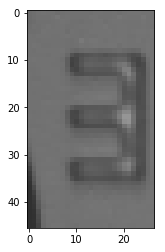

In [27]:
plt.imshow(apt_data.iloc[0]['apt_num_digit_images'][0])

In [28]:
from skimage import transform, exposure
img = apt_data.iloc[0]['apt_num_digit_images'][0]
img = transform.resize(img, (32, 32), mode='constant')[np.newaxis]
img = exposure.rescale_intensity(img, out_range=(0, 1))
img.shape

(1, 32, 32, 3)

In [29]:
img.min(), img.max()

(0.0, 1.0)

In [30]:
cytometer.digit_model.predict(img)

array([[1.9934060e-11, 2.2499542e-11, 2.5927435e-05, 9.9581879e-01,
        1.1774018e-10, 4.1502537e-03, 2.5342158e-06, 1.1473743e-08,
        1.8429759e-08, 2.6263060e-06]], dtype=float32)

In [31]:
apt_data[['apt_num','st_num','cell_count']]

,apt_num,st_num,cell_count
0,31,11,1
1,31,10,1
2,31,09,1
3,30,10,1
4,30,11,1
5,30,09,1


In [30]:
cell_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 2
Data columns (total 27 columns):
acq_apartment       17 non-null object
acq_cohort          17 non-null object
acq_color           17 non-null object
acq_condition       17 non-null object
acq_datetime        17 non-null datetime64[ns]
acq_hours           17 non-null object
acq_id              17 non-null object
acq_processed_at    17 non-null datetime64[ns]
acq_pump            17 non-null object
acq_street          17 non-null object
apt_id              17 non-null int64
apt_num             17 non-null object
area                17 non-null int64
cell_id             17 non-null int64
cell_image          0 non-null object
centroid_x          17 non-null float64
centroid_y          17 non-null float64
eccentricity        17 non-null float64
in_chamber          17 non-null bool
in_trap             17 non-null bool
roi_xmax            17 non-null int64
roi_xmin            17 non-null int64
roi_ymax            17 non-null

In [31]:
cell_data.groupby(['in_chamber', 'in_trap']).size()

in_chamber  in_trap
True        False      17
dtype: int64

#### Performance Profiling

In [ ]:
%load_ext line_profiler

In [51]:
from celldom.extract import apartment_extraction
from celldom.extract import cell_extraction
from celldom.extract import marker_extraction

In [52]:
%lprun -f cytometer.analyze -f apartment_extraction.extract -f marker_extraction.extract -f cell_extraction.extract cytometer.analyze(acq, dpf=NO_IMAGES)

Timer unit: 1e-06 s

Total time: 2.56635 s
File: /lab/repos/celldom/python/source/celldom/core/cytometry.py
Function: analyze at line 210

Line #      Hits         Time  Per Hit   % Time  Line Contents
   210                                               def analyze(self, acquisition, dpf=NO_IMAGES):
   211                                                   """Run cytometry analysis on a single acquisition
   212                                           
   213                                                   Args:
   214                                                       acquisition: Acquisition object
   215                                                       dpf: "Data Persistence Flags" indicating how more expensive objects like images are handled; see
   216                                                           celldom.extract for preset groupings of flags that can be used here -- for example:
   217                                                           ```
   218   